@ Author : Anirudh Sathish , @Roll No : CS20B1125


Performing Histogram equalization on pout dark and displaying the same


In [1]:
# loading the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2


load the image


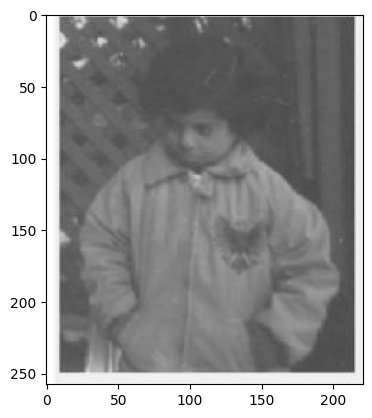

In [2]:
pout_dark = cv2.imread("pout-dark.jpg")
plt.imshow(pout_dark)
plt.show()


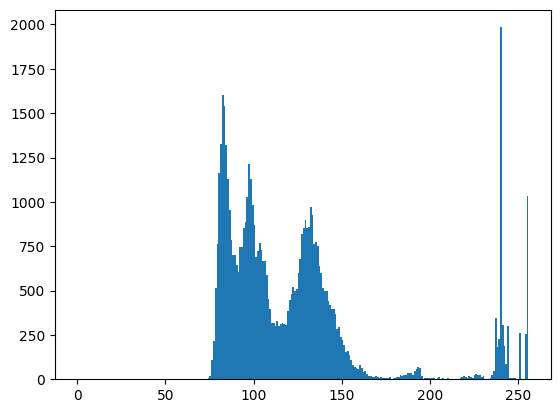

In [3]:
# convert pout_dark to grayscale
pout_dark_gray = cv2.cvtColor(pout_dark, cv2.COLOR_BGR2GRAY)
# obtain histogram
hist = cv2.calcHist([pout_dark_gray], [0], None, [256], [0, 256])
# Display the histogram
plt.hist(pout_dark_gray.ravel(), 256, [0, 256])
plt.show()


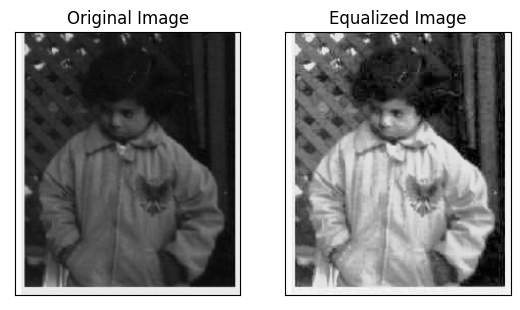

In [4]:
# Perform histogram equalization
equalized_img = cv2.equalizeHist(pout_dark_gray)
# Display the original and equalized images
plt.subplot(121), plt.imshow(pout_dark_gray, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image'), plt.xticks([]), plt.yticks([])
plt.show()


Performing part2


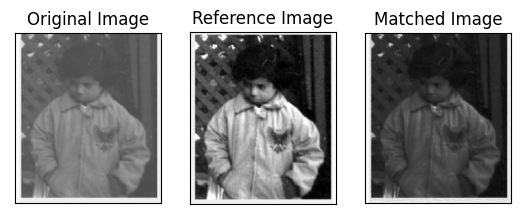

In [5]:
# Load the images
img = cv2.imread('pout-dark.jpg')
ref_img = cv2.imread('pout-bright.jpg')

# Convert the images to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ref_gray = cv2.cvtColor(ref_img, cv2.COLOR_BGR2GRAY)

# Calculate the histograms
img_hist, _ = np.histogram(img_gray.flatten(), 256, [0, 256])
ref_hist, _ = np.histogram(ref_gray.flatten(), 256, [0, 256])

# Calculate the cumulative distribution functions
img_cdf = img_hist.cumsum()
img_cdf_normalized = img_cdf * img_hist.max() / img_cdf.max()

ref_cdf = ref_hist.cumsum()
ref_cdf_normalized = ref_cdf * img_hist.max() / ref_cdf.max()

# Perform histogram matching
matched = np.interp(img_gray.flatten(), np.arange(
    256), ref_cdf_normalized).reshape(img_gray.shape)

# Display the original and matched images
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB))
plt.title('Reference Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(matched, cmap='gray')
plt.title('Matched Image'), plt.xticks([]), plt.yticks([])
plt.show()


Write user defined functions for both


Function for histogram equalisation


In [24]:
def histEqualise(input_img):
    # Compute the histogram of the image
    img_hist, bins = np.histogram(input_img.flatten(), 256, [0, 256])

    # Calculate cummulative function and later normalise
    cummulative = img_hist.cumsum()
    cummulative_normalized = cummulative * 255 / cummulative[-1]
    histogram_equalized_image = np.interp(input_img.flatten(), bins[:-1], cummulative_normalized)

    # Reshape the histogram_equalized_image intensities back to the original image shape
    histogram_equalized_image = histogram_equalized_image.reshape(input_img.shape)
    
    # Display in subplot format 
    plt.subplot(121), plt.imshow(input_img, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(histogram_equalized_image, cmap='gray')
    plt.title('Equalized Image'), plt.xticks([]), plt.yticks([])
    plt.show()


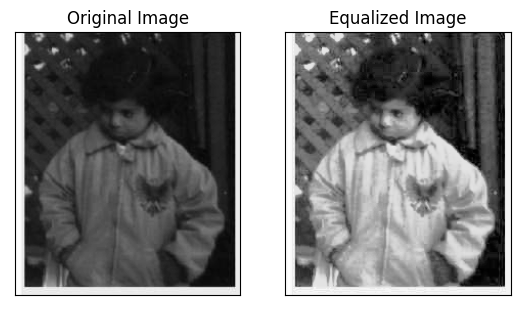

In [26]:
# using user defined 
histEqualise(pout_dark_gray)


Second part of the Question


Do histogram matching (specification) on the pout-dark image, keeping pout-bright as a reference image.


In [30]:
def histMatching(ref_img, input_img):

    # Calculate the histograms of the reference and input images
    ref_hist, bins = np.histogram(ref_img.flatten(), 256, [0, 256])
    input_hist, bins = np.histogram(input_img.flatten(), 256, [0, 256])

    # Calculating cdf's and their normalized formats 
    ref_cummulative = ref_hist.cumsum()
    input_cummulative = input_hist.cumsum()
    ref_cummulative_normalized = ref_cummulative * 255 / ref_cummulative[-1]
    input_cummulative_normalized = input_cummulative * 255 / input_cummulative[-1]

    # Mapping from input to reference 

    mapping = np.zeros(256)
    for i in range(256):
        j = 0
        while j < 256 and input_cummulative_normalized[i] > ref_cummulative_normalized[j]:
            j += 1
        mapping[i] = j

    # From the mapping perform histogram matching 
    histogram_matched_img = np.zeros_like(input_img)
    for i in range(input_img.shape[0]):
        for j in range(input_img.shape[1]):
            histogram_matched_img[i][j] = mapping[input_img[i][j]]


    plt.subplot(131), plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB))
    plt.title('Reference Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(histogram_matched_img, cmap='gray')
    plt.title('Matched Image'), plt.xticks([]), plt.yticks([])
    plt.show()


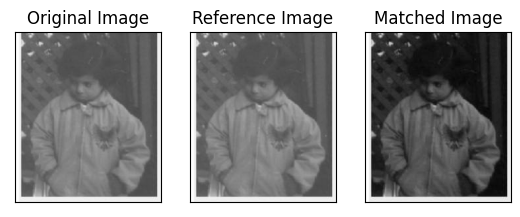

In [31]:
# Getting grayscale information for dark and bright
pout_dark = cv2.imread("pout-dark.jpg")
pout_dark_gray = cv2.cvtColor(pout_dark, cv2.COLOR_BGR2GRAY)
pout_bright = cv2.imread("pout-bright.jpg")
pout_bright_gray = cv2.cvtColor(pout_dark, cv2.COLOR_BGR2GRAY)

histMatching(pout_bright_gray, pout_dark_gray)
